# Reproducing Gunseli CDA Study (2019) - L vs R
### Notes

In [1]:
import numpy as np
import pandas as pd
import glob
import pickle
import copy

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_eeglab

from scipy.io import loadmat

import os
import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/')
from events import get_specific_events, get_epochs, get_CDA, prep_report, fill_report, get_report, checksum

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prep Data

In [2]:
#==================================================================
# General Variables
#==================================================================
triggers = dict();

triggers['5'] = [5] 
triggers['6'] = [6]

triggers['left'] = [10]
triggers['right'] = [20]
triggers['TBD'] = [30, 255]  # 255 is only for pp24 which doesn't have '30' but '255'

triggers['good'] = []
triggers['bad'] = []

# Labels
conds = ['5', '6']
sides = ['left', 'right', 'TBD']
perfs = ['good', 'bad']

# CDA Channels
chan_right = ['P8', 'PO8', 'O2']
chan_left = ['P7', 'PO7', 'O1']

# Epoc Information
epoch_length = 1.2
epoch_tmin = -0.5
baseline_corr = (-0.2, 0)

# # CDA main variable & Reports
cda_dict = dict()
epochs_dict_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
folderpath = '/Users/nick/Documents/PhD/CDA Datasets/Gunseli 2019/'
#filepath = folderpath + 'raw data files/' + 'StratAtt_e2_LoadChans_pp11.set'

for filepath in glob.iglob(folderpath + 'raw data files/' + '*.set'):
    filename = filepath[filepath.rfind('/')+1:]
    print('Processing: ' + filename + '...')

    # 1. -- Load File --
    raw = read_raw_eeglab(filepath, preload=True)

    # Resample
    preproc = raw.resample(500)

    # 2. -- General Preprocess --
    # Keep only EEG channels and reference
    #raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])

    # Set Electrodes Locations
    #montage = mne.channels.make_standard_montage('biosemi64')
    #raw.set_montage(montage)

    # Filter
    preproc = preproc.filter(.1, 6., fir_design='firwin')

    # Get events
    events = mne.events_from_annotations(preproc)

    # Chan Pairs
    chan_pairs = ['{}-{}'.format(chan_right[i], chan_left[i]) for i, chan in enumerate(chan_right)]

    for i, chan in enumerate(chan_right):
        preproc = mne.set_bipolar_reference(preproc, anode=[str(chan_right[i])], cathode=[str(chan_left[i])])
        #new_cda = cur_bipolar_epochs.pick_channels(['{}-{}'.format(chan_right[i], chan_left[i])]).average().data

    preproc = preproc.pick_channels(chan_pairs)
    
    #preproc.plot(events=events[0], block=True, lowpass=40)

    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    #behavfilepath = folderpath + 'raw data files/' + 'subject-{}.csv'.format(filepath[filepath.rfind('pp')+2:filepath.rfind('.')])

    #behav = pd.read_csv(behavfilepath)  
    #behav_hl = behav['block_type'][(behav['block_type'] == 'low') | (behav['block_type'] == 'high')]

    # Redo Triggers based on annotation in file!
    new_triggers = copy.deepcopy(triggers)
    for k in new_triggers.keys():
        for i,t in enumerate(new_triggers[k]):
            if str(t) in events[1].keys():
                new_triggers[k][i] = events[1][str(t)]
    specific_events = get_specific_events(events[0], conds, sides, perfs, new_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr)

    epochs_dict_all[filename] = epochs_dict
    
    # ------------------------
    # 4. - Report & Checksum -
    # ------------------------
    #report = fill_report(report, filename, specific_events)
    #report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)

    # ------------------------
    # 5. -- CDA --
    # ------------------------
    #cda_dict[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)

# Add time points to CDA for later use.
cda_dict['times'] = epochs_dict['5']['left']['good'].times

subreport = get_report(report, ['5','6'], ['left','right'], ['good'], [])
report

Processing: StratAtt_e2_LoadChans_pp2.set...
Reading /Users/nick/Documents/PhD/CDA Datasets/Gunseli 2019/raw data files/StratAtt_e2_LoadChans_pp2.fdt
Reading 0 ... 2452479  =      0.000 ...  4789.998 secs...


/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2395000
    Range : 0 ... 2394999 =      0.000 ...  4789.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2395000
    Range : 0 ... 2394999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2113500
    Range : 0 ... 2113499 =      0.000 ...  4226.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2113500
    Range : 0 ... 2113499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2154500
    Range : 0 ... 2154499 =      0.000 ...  4308.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2154500
    Range : 0 ... 2154499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2325500
    Range : 0 ... 2325499 =      0.000 ...  4650.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2325500
    Range : 0 ... 2325499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2278000
    Range : 0 ... 2277999 =      0.000 ...  4555.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2278000
    Range : 0 ... 2277999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2630500
    Range : 0 ... 2630499 =      0.000 ...  5260.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2630500
    Range : 0 ... 2630499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2563500
    Range : 0 ... 2563499 =      0.000 ...  5126.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2563500
    Range : 0 ... 2563499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2403500
    Range : 0 ... 2403499 =      0.000 ...  4806.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2403500
    Range : 0 ... 2403499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=1978500
    Range : 0 ... 1978499 =      0.000 ...  3956.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=1978500
    Range : 0 ... 1978499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2248000
    Range : 0 ... 2247999 =      0.000 ...  4495.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2248000
    Range : 0 ... 2247999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2342000
    Range : 0 ... 2341999 =      0.000 ...  4683.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2342000
    Range : 0 ... 2341999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Data file name in EEG.data (StratAtt_e2_LoadChans_pp29set.fdt) is incorrect, the file name must have changed on disk, using the correct file name (StratAtt_e2_LoadChans_pp29.fdt).
  raw = read_raw_eeglab(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2283500
    Range : 0 ... 2283499 =      0.000 ...  4566.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2283500
    Range : 0 ... 2283499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2657500
    Range : 0 ... 2657499 =      0.000 ...  5314.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2657500
    Range : 0 ... 2657499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=1938000
    Range : 0 ... 1937999 =      0.000 ...  3875.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=1938000
    Range : 0 ... 1937999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2140000
    Range : 0 ... 2139999 =      0.000 ...  4279.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2140000
    Range : 0 ... 2139999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=1967000
    Range : 0 ... 1966999 =      0.000 ...  3933.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=1967000
    Range : 0 ... 1966999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2345000
    Range : 0 ... 2344999 =      0.000 ...  4689.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2345000
    Range : 0 ... 2344999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2090500
    Range : 0 ... 2090499 =      0.000 ...  4180.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2090500
    Range : 0 ... 2090499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2513000
    Range : 0 ... 2512999 =      0.000 ...  5025.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2513000
    Range : 0 ... 2512999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2193500
    Range : 0 ... 2193499 =      0.000 ...  4386.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2193500
    Range : 0 ... 2193499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2401500
    Range : 0 ... 2401499 =      0.000 ...  4802.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2401500
    Range : 0 ... 2401499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2406500
    Range : 0 ... 2406499 =      0.000 ...  4812.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2406500
    Range : 0 ... 2406499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6', 'boundary']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=1779000
    Range : 0 ... 1778999 =      0.000 ...  3557.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=1779000
    Range : 0 ... 1778999 

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '255', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2107500
    Range : 0 ... 2107499 =      0.000 ...  4214.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2107500
    Range : 0 ... 2107499 =    

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2159500
    Range : 0 ... 2159499 =      0.000 ...  4318.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2159500
    Range : 0 ... 2159499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2384500
    Range : 0 ... 2384499 =      0.000 ...  4768.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2384500
    Range : 0 ... 2384499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2654000
    Range : 0 ... 2653999 =      0.000 ...  5307.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2654000
    Range : 0 ... 2653999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2097000
    Range : 0 ... 2096999 =      0.000 ...  4193.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2097000
    Range : 0 ... 2096999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2296000
    Range : 0 ... 2295999 =      0.000 ...  4591.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2296000
    Range : 0 ... 2295999 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_43594/3566940652.py:46: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['VEOGsT', 'VEOGsB', 'HEOGsL', 'HEOGsR']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 6 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 6.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['1', '10', '20', '30', '5', '6']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2413500
    Range : 0 ... 2413499 =      0.000 ...  4826.998 secs
Ready.
Added the following bipolar channels:
P8-P7
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=2413500
    Range : 0 ... 2413499 =      0.000

/Users/nick/Documents/PhD/CLCT/reprod/studies/Gunseli-2019/events.py:98: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


,5,6,left,right,TBD,good,bad,5-left,5-left-good,5-good,...,6-left-bad,6-bad,6-right,6-right-good,6-right-bad,6-TBD,6-TBD-good,6-TBD-bad,checksum,notes


In [3]:
times = cda_dict['times']
del cda_dict['times']

## 2. Save CDA Data

In [ ]:
#====================================
# Save the whole CDA dict.
#====================================
with open("cda_gunseli2019_raw.pkl","wb") as f:
    pickle.dump(cda_dict, f)

## 3. Load CDA Data

In [ ]:
with open("cda_gunseli2019_raw.pkl","rb") as f:
    cda_dict = pickle.load(f)

times = cda_dict['times']
del cda_dict['times']

print("Participants: {}, Conditions: {}". format(len(cda_dict), cda_dict[list(cda_dict.keys())[0]].keys()))

## 4. Plot CDA Data - Grand CDA Average

In [4]:
cda_all = dict()

for cond in epochs_dict_all[list(epochs_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()
    cda_all[cond]['left'] = np.array([])
    cda_all[cond]['right'] = np.array([])

    for f in epochs_dict_all.keys():        
        perf = 'good'
        
        ldata = epochs_dict_all[f][cond]['left'][perf].average().data.mean(0)
        rdata = epochs_dict_all[f][cond]['right'][perf].average().data.mean(0)
                   
        cda_all[cond]['left'] = np.vstack([cda_all[cond]['left'], ldata]) if len(cda_all[cond]['left']) else ldata
        cda_all[cond]['right'] = np.vstack([cda_all[cond]['right'], rdata]) if len(cda_all[cond]['right']) else rdata

Text(0.5, 0, '[s]')

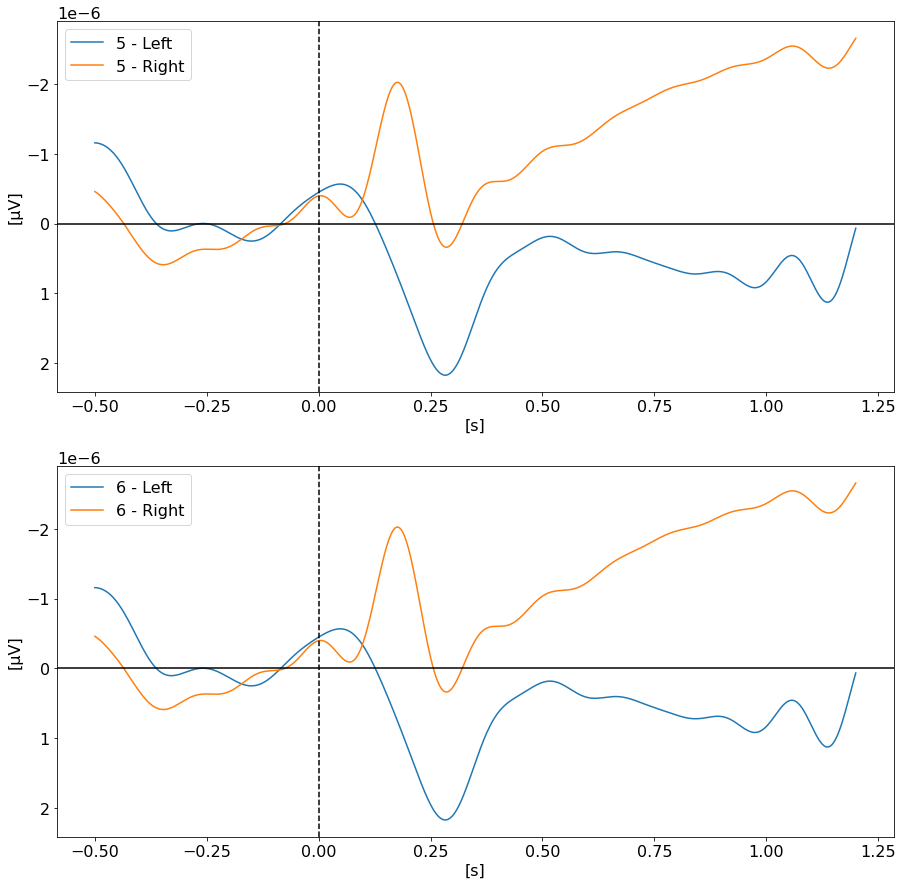

In [6]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

# 2. Plot Figure #1
axs[0].plot(times, cda_all['5']['left'].mean(0), label='5 - Left')
axs[0].plot(times, cda_all['5']['right'].mean(0), label='5 - Right')
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

# 2. Plot Figure #2
axs[1].plot(times, cda_all['6']['left'].mean(0), label='6 - Left')
axs[1].plot(times, cda_all['6']['right'].mean(0), label='6 - Right')
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')


#plt.savefig("./V-2018-Exp1_CDA-reprod.png", dpi=300, format='png')